In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
data_2012 = pd.read_csv('BPI_2012_rft2.csv')
data_2012.head(15)

,Unnamed: 0,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,next_case,next_event,...,A_APPROVED,O_ACCEPTED,A_ACTIVATED,O_CANCELLED,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude
0,0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112,173688.0,A_PARTLYSUBMITTED,...,0,0,0,0,0,0,0,0,0,0
1,1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112,173688.0,A_PREACCEPTED,...,0,0,0,0,0,0,0,0,0,0
2,2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112,173688.0,A_PREACCEPTED,...,0,0,0,0,0,0,0,0,0,0
3,3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112,173688.0,W_Completeren aanvraag,...,0,0,0,0,0,0,0,0,0,0
4,4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112,173688.0,A_ACCEPTED,...,0,0,0,0,0,0,0,0,0,0
5,5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862,173688.0,O_SELECTED,...,0,0,0,0,0,0,0,0,0,0
6,6,173688,O_SELECTED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862,173688.0,A_FINALIZED,...,0,0,0,0,0,0,0,0,0,0
7,7,173688,A_FINALIZED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862,173688.0,O_CREATED,...,0,0,0,0,0,0,0,0,0,0
8,8,173688,O_CREATED,2011/10/01 11:45:11.197,2011/10/01 11:45:11.197,20000,2011/10/01 00:38:44.546,10862,173688.0,O_SENT,...,0,0,0,0,0,0,0,0,0,0
9,9,173688,O_SENT,2011/10/01 11:45:11.380,2011/10/01 11:45:11.380,20000,2011/10/01 00:38:44.546,10862,173688.0,O_SENT,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# making dummy variables from the event, in this way the model can use all the different event types.
event = pd.get_dummies(data_2012['event'])
event.head()

,A_ACCEPTED,A_ACTIVATED,A_APPROVED,A_CANCELLED,A_DECLINED,A_FINALIZED,A_PARTLYSUBMITTED,A_PREACCEPTED,A_REGISTERED,A_SUBMITTED,...,O_DECLINED,O_SELECTED,O_SENT,O_SENT_BACK,W_Afhandelen leads,W_Beoordelen fraude,W_Completeren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen offertes,W_Valideren aanvraag
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
df2 = pd.concat([data_2012, event], axis=1)
df2.drop(['event'], axis=1, inplace=True)
df2.head()

,Unnamed: 0,case,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,next_case,next_event,A_SUBMITTED,...,O_DECLINED,O_SELECTED,O_SENT,O_SENT_BACK,W_Afhandelen leads,W_Beoordelen fraude,W_Completeren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen offertes,W_Valideren aanvraag
0,0,173688,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112,173688.0,A_PARTLYSUBMITTED,0,...,0,0,0,0,0,0,0,0,0,0
1,1,173688,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112,173688.0,A_PREACCEPTED,1,...,0,0,0,0,0,0,0,0,0,0
2,2,173688,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112,173688.0,A_PREACCEPTED,1,...,0,0,0,0,0,0,0,0,0,0
3,3,173688,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112,173688.0,W_Completeren aanvraag,1,...,0,0,0,0,0,0,0,0,0,0
4,4,173688,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112,173688.0,A_ACCEPTED,1,...,0,0,0,0,0,0,1,0,0,0


In [23]:
# dropping the rows, the model don't need.
from sklearn.model_selection import train_test_split
X = df2.drop(columns=['Unnamed: 0', 'startTime', 'completeTime', 'REG_DATE', 'next_event', 'next_case', 'W_Valideren aanvraag'])
y = df2['next_event']

In [24]:
# scaling all features 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [25]:
# split the test and train data, without shuffle. this is because the processes should stay with each other
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.3, shuffle=False)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

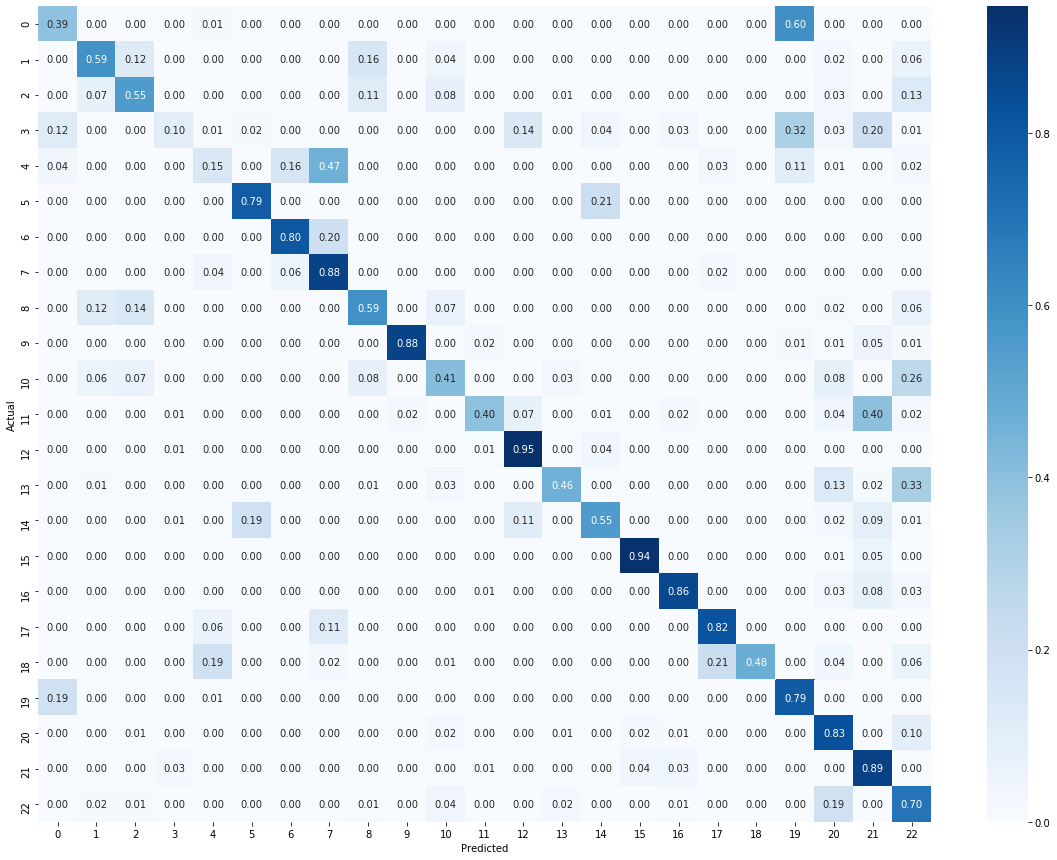

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
cm =confusion_matrix(y_test, rfc_pred)

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [28]:
classification_report(y_test, rfc_pred, output_dict = True)

{'A_ACCEPTED': {'precision': 0.2750110180696342,
  'recall': 0.38927011852776044,
  'f1-score': 0.32231404958677684,
  'support': 1603},
 'A_ACTIVATED': {'precision': 0.6179401993355482,
  'recall': 0.589540412044374,
  'f1-score': 0.6034063260340634,
  'support': 631},
 'A_APPROVED': {'precision': 0.5619967793880838,
  'recall': 0.5530903328050714,
  'f1-score': 0.5575079872204474,
  'support': 631},
 'A_CANCELLED': {'precision': 0.2225609756097561,
  'recall': 0.1,
  'f1-score': 0.13799621928166353,
  'support': 730},
 'A_DECLINED': {'precision': 0.43060959792477305,
  'recall': 0.1456140350877193,
  'f1-score': 0.21763356276630613,
  'support': 2280},
 'A_FINALIZED': {'precision': 0.7210526315789474,
  'recall': 0.7868538608806637,
  'f1-score': 0.7525175465364663,
  'support': 1567},
 'A_PARTLYSUBMITTED': {'precision': 0.8728184553660983,
  'recall': 0.8006993006993007,
  'f1-score': 0.8352049140992418,
  'support': 5434},
 'A_PREACCEPTED': {'precision': 0.6352593054041427,
  'reca

In [12]:
from sklearn.model_selection import GridSearchCV
rfc_param_grid = {'n_estimators': [10, 50, 100, 200, 300, 500, 800],
                  'max_depth': [4, 5, 6, 7, 8],
                  'criterion': ['entropy', 'gini']}
rfc_grid = GridSearchCV(estimator=rfc,
                        param_grid=rfc_param_grid,
                        refit=True,
                        verbose = 3)
# fitting our model with optimized parameters
rfc_grid.fit(X_train,y_train)
# finding our best estimators
optimizedRFC = rfc_grid.best_estimator_
optimizedRFC

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] criterion=entropy, max_depth=4, n_estimators=10 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=4, n_estimators=10, score=0.622, total=   0.6s
[CV] criterion=entropy, max_depth=4, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=entropy, max_depth=4, n_estimators=10, score=0.605, total=   0.6s
[CV] criterion=entropy, max_depth=4, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  criterion=entropy, max_depth=4, n_estimators=10, score=0.630, total=   0.7s
[CV] criterion=entropy, max_depth=4, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=10, score=0.597, total=   0.6s
[CV] criterion=entropy, max_depth=4, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=10, score=0.587, total=   0.6s
[CV] criterion=entropy, max_depth=4, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=50, score=0.639, total=   2.2s
[CV] criterion=entropy, max_depth=4, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=50, score=0.621, total=   2.2s
[CV] criterion=entropy, max_depth=4, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=50, score=0.625, total=   2.5s
[CV] criterion=entropy, max_depth=4, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=50, score=0.616, total=   2.7s


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.694, total=  12.4s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.698, total=  12.4s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.683, total=  12.5s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.682, total=  12.7s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.680, total=  21.6s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.690, total=  21.0s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.692, total= 

[CV]  criterion=entropy, max_depth=7, n_estimators=50, score=0.736, total=   2.8s
[CV] criterion=entropy, max_depth=7, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=50, score=0.745, total=   2.9s
[CV] criterion=entropy, max_depth=7, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=50, score=0.745, total=   2.8s
[CV] criterion=entropy, max_depth=7, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=50, score=0.740, total=   2.8s
[CV] criterion=entropy, max_depth=7, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=7, n_estimators=50, score=0.722, total=   2.8s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.741, total=   5.6s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.744, total=   6.3

[CV]  criterion=entropy, max_depth=8, n_estimators=300, score=0.744, total=  16.4s
[CV] criterion=entropy, max_depth=8, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=500, score=0.754, total=  27.3s
[CV] criterion=entropy, max_depth=8, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=500, score=0.760, total=  27.5s
[CV] criterion=entropy, max_depth=8, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=500, score=0.758, total=  27.1s
[CV] criterion=entropy, max_depth=8, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=500, score=0.757, total=  27.9s
[CV] criterion=entropy, max_depth=8, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=500, score=0.745, total=  27.2s
[CV] criterion=entropy, max_depth=8, n_estimators=800 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=800, score=0.751, total= 

[CV]  criterion=gini, max_depth=5, n_estimators=50, score=0.669, total=   2.1s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.683, total=   4.3s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.681, total=   4.2s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.693, total=   4.0s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.696, total=   4.0s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.670, total=   4.0s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.682, total=   7.9s
[CV] criterion=

[CV]  criterion=gini, max_depth=6, n_estimators=500, score=0.699, total=  21.4s
[CV] criterion=gini, max_depth=6, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=800, score=0.700, total=  33.9s
[CV] criterion=gini, max_depth=6, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=800, score=0.717, total=  33.8s
[CV] criterion=gini, max_depth=6, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=800, score=0.722, total=  34.1s
[CV] criterion=gini, max_depth=6, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=800, score=0.716, total=  33.8s
[CV] criterion=gini, max_depth=6, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=800, score=0.701, total=  33.9s
[CV] criterion=gini, max_depth=7, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=10, score=0.662, total=   0.7s
[CV] criterion=

[CV]  criterion=gini, max_depth=8, n_estimators=100, score=0.736, total=   5.0s
[CV] criterion=gini, max_depth=8, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=200, score=0.717, total=   9.9s
[CV] criterion=gini, max_depth=8, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=200, score=0.757, total=  10.3s
[CV] criterion=gini, max_depth=8, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=200, score=0.751, total=  10.1s
[CV] criterion=gini, max_depth=8, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=200, score=0.754, total=  10.0s
[CV] criterion=gini, max_depth=8, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=200, score=0.734, total=   9.9s
[CV] criterion=gini, max_depth=8, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=8, n_estimators=300, score=0.715, total=  14.8s
[CV] criterion

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed: 73.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
# import joblib
# joblib.dump(optimizedRFC,'./optimizedRFC.joblib')

['./optimizedRFC.joblib']

In [17]:
optimizedRFC= joblib.load('./optimizedRFC.joblib')

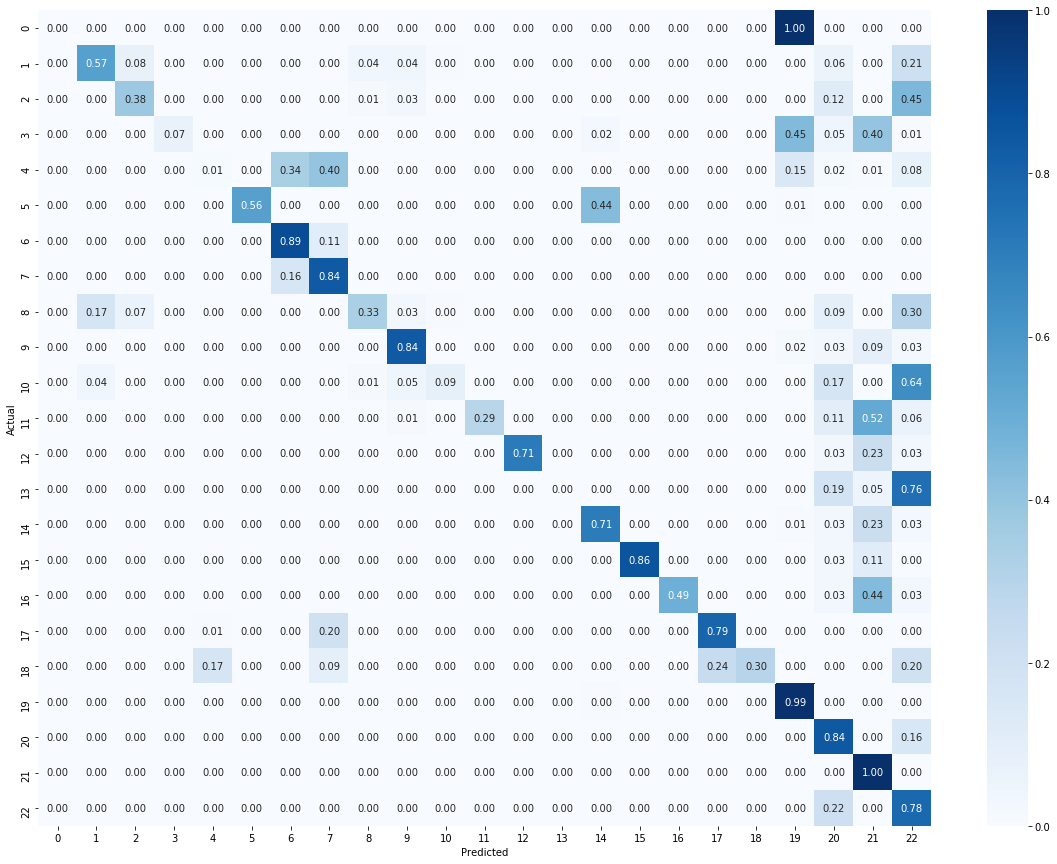

In [14]:
# re-running preds
rfc_grid_pred = optimizedRFC.predict(X_test)
# re-evaluating
cm =confusion_matrix(y_test, rfc_grid_pred)

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [15]:
classification_report(y_test, rfc_grid_pred, output_dict = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'A_ACCEPTED': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1603},
 'A_ACTIVATED': {'precision': 0.7300613496932515,
  'recall': 0.5657686212361331,
  'f1-score': 0.6375,
  'support': 631},
 'A_APPROVED': {'precision': 0.7250755287009063,
  'recall': 0.3803486529318542,
  'f1-score': 0.49896049896049893,
  'support': 631},
 'A_CANCELLED': {'precision': 0.9811320754716981,
  'recall': 0.07123287671232877,
  'f1-score': 0.13282247765006386,
  'support': 730},
 'A_DECLINED': {'precision': 0.34615384615384615,
  'recall': 0.007894736842105263,
  'f1-score': 0.01543739279588336,
  'support': 2280},
 'A_FINALIZED': {'precision': 1.0,
  'recall': 0.5596681557115507,
  'f1-score': 0.7176759410801964,
  'support': 1567},
 'A_PARTLYSUBMITTED': {'precision': 0.7593902247367594,
  'recall': 0.889216047110784,
  'f1-score': 0.8191913198270747,
  'support': 5434},
 'A_PREACCEPTED': {'precision': 0.6758165392633774,
  'recall': 0.8369191049913941,
  'f1-score': 0.74778931180315